In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
%matplotlib inline

# Structure type maps

In [2]:
tweb = np.load('borg_sdss_tweb.npz')

#Minimum and maximum position along the x-axis in Mpc/h
xmin=tweb['ranges'][0]
xmax=tweb['ranges'][1]

#Minimum and maximum position along the y-axis in Mpc/h
ymin=tweb['ranges'][2]
ymax=tweb['ranges'][3]

#Minimum and maximum position along the z-axis in Mpc/h
zmin=tweb['ranges'][4]
zmax=tweb['ranges'][5]

#3D probabilistic maps for T-web structures
V=tweb['voids']
S=tweb['sheets']
F=tweb['filaments']
C=tweb['clusters']

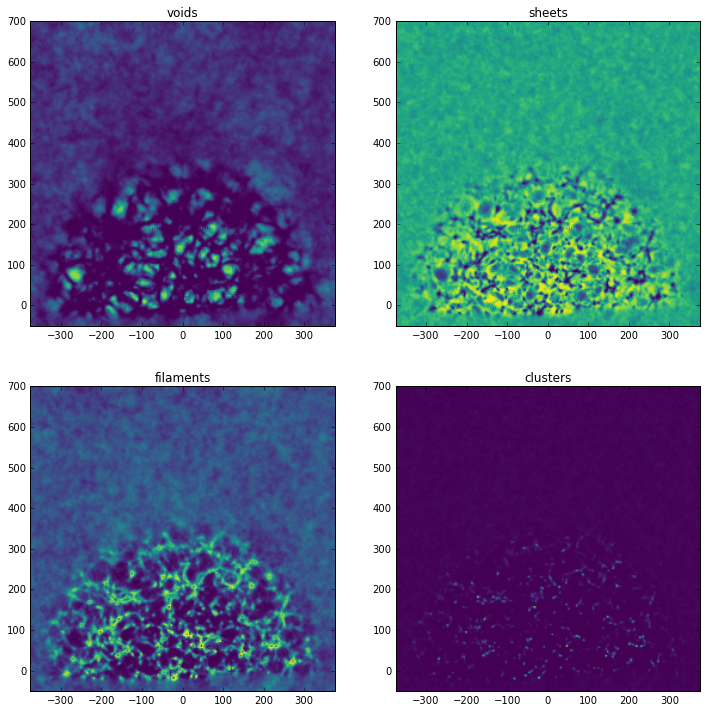

In [3]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='row', sharey='col', figsize=(12,12))
ax1.imshow(V[:,:,128], origin='lower', extent=[ymin,ymax,zmin,zmax], vmin=0., vmax=1., cmap="viridis")
ax1.set_title("voids")
ax2.imshow(S[:,:,128], origin='lower', extent=[ymin,ymax,zmin,zmax], vmin=0., vmax=1., cmap="viridis")
ax2.set_title("sheets")
ax3.imshow(F[:,:,128], origin='lower', extent=[ymin,ymax,zmin,zmax], vmin=0., vmax=1., cmap="viridis")
ax3.set_title("filaments")
ax4.imshow(C[:,:,128], origin='lower', extent=[ymin,ymax,zmin,zmax], vmin=0., vmax=1., cmap="viridis")
ax4.set_title("clusters")
plt.show()

# Entropy

In [4]:
import warnings
warnings.filterwarnings("ignore")

#Compute the entropy
VlogV = V*np.log2(V)
SlogS = S*np.log2(S)
FlogF = F*np.log2(F)
ClogC = C*np.log2(C)
VlogV[np.isnan(VlogV)]=0.
SlogS[np.isnan(SlogS)]=0.
FlogF[np.isnan(FlogF)]=0.
ClogC[np.isnan(ClogC)]=0.

H = - VlogV - SlogS - FlogF - ClogC

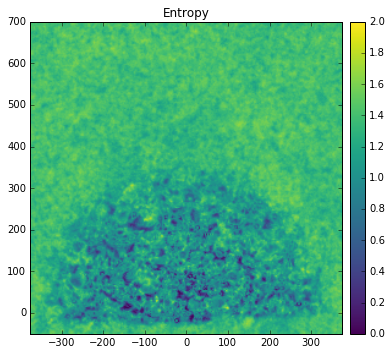

In [5]:
#Now make a example plot
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(H[:,:,128], origin='lower', extent=[ymin,ymax,zmin,zmax], vmin=0., vmax=2., cmap="viridis")
ax.set_title("Entropy")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = fig.colorbar(im, cax=cax)
plt.show()

# Information gain (Kullback-Leibler divergence)

In [6]:
#Prior probabilities (numbers given in table II in Leclercq et al. 2015a)
Prior_V = 0.14261
Prior_S = 0.59561
Prior_F = 0.24980
Prior_C = 0.01198

In [7]:
#Compute the Kullback-Leibler divergence
VlogV = V*np.log2(V)
SlogS = S*np.log2(S)
FlogF = F*np.log2(F)
ClogC = C*np.log2(C)
VlogV[np.isnan(VlogV)]=0.
SlogS[np.isnan(SlogS)]=0.
FlogF[np.isnan(FlogF)]=0.
ClogC[np.isnan(ClogC)]=0.

VlogPrior_V = V*np.log2(Prior_V)
SlogPrior_S = S*np.log2(Prior_S)
FlogPrior_F = F*np.log2(Prior_F)
ClogPrior_C = C*np.log2(Prior_C)

DKL = VlogV + SlogS + FlogF + ClogC - VlogPrior_V - SlogPrior_S - FlogPrior_F - ClogPrior_C

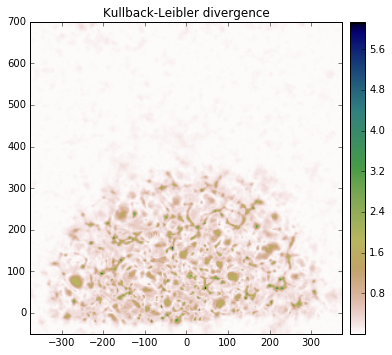

In [8]:
#Now make a example plot
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(DKL[:,:,128], origin='lower', extent=[ymin,ymax,zmin,zmax], cmap="gist_earth_r")
ax.set_title("Kullback-Leibler divergence")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cbar = fig.colorbar(im, cax=cax)
plt.show()

# Decision theory (Leclercq et al. 2015b, arXiv:1503.00730)

In [9]:
#3D probabilistic maps for T-web structures
Posterior_l0=tweb['voids']
Posterior_l1=tweb['sheets']
Posterior_l2=tweb['filaments']
Posterior_l3=tweb['clusters']

In [10]:
#Prior probabilities (numbers given in table II in Leclercq et al. 2015a)
Prior_l0 = 0.14261
Prior_l1 = 0.59561
Prior_l2 = 0.24980
Prior_l3 = 0.01198

In [11]:
#Decision theory framework introduced in Leclercq et al. (2015b)
alpha = 1.5	# The free parameter here corresponding to the "cost of the game"

G_a0l0 = 1./Prior_l0-alpha
G_awl0 = -alpha
G_a4l0 = 0.

G_a1l1 = 1./Prior_l1-alpha
G_awl1 = -alpha
G_a4l1 = 0.

G_a2l2 = 1./Prior_l2-alpha
G_awl2 = -alpha
G_a4l2 = 0.

G_a3l3 = 1./Prior_l3-alpha
G_awl3 = -alpha
G_a4l3 = 0.

# define the utility functions
U_a0 = G_a0l0*Posterior_l0 + G_awl1*Posterior_l1 + G_awl2*Posterior_l2 + G_awl3*Posterior_l3
U_a1 = G_awl0*Posterior_l0 + G_a1l1*Posterior_l1 + G_awl2*Posterior_l2 + G_awl3*Posterior_l3
U_a2 = G_awl0*Posterior_l0 + G_awl1*Posterior_l1 + G_a2l2*Posterior_l2 + G_awl3*Posterior_l3
U_a3 = G_awl0*Posterior_l0 + G_awl1*Posterior_l1 + G_awl3*Posterior_l2 + G_a3l3*Posterior_l3
U_a4 = G_a4l0*Posterior_l0 + G_a4l1*Posterior_l1 + G_a4l2*Posterior_l2 + G_a4l3*Posterior_l3

# make the decision maximizing the utility function
MAP = np.copy(U_a4)
MAP[np.where((U_a0>U_a1) * (U_a0>U_a2) * (U_a0>U_a3) * (U_a0>U_a4))] = 0.; #voids
MAP[np.where((U_a1>U_a0) * (U_a1>U_a2) * (U_a1>U_a3) * (U_a1>U_a4))] = 1.; #sheets
MAP[np.where((U_a2>U_a0) * (U_a2>U_a1) * (U_a2>U_a3) * (U_a2>U_a4))] = 2.; #filaments
MAP[np.where((U_a3>U_a0) * (U_a3>U_a1) * (U_a3>U_a2) * (U_a3>U_a4))] = 3.; #clusters
MAP[np.where((U_a4>=U_a0) * (U_a4>=U_a1) * (U_a4>=U_a2) * (U_a4>=U_a3))] = -1.; #undecided

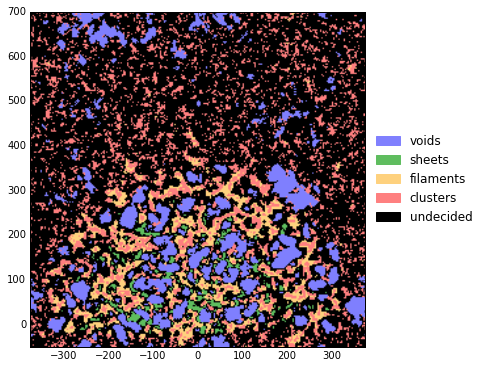

In [12]:
#Plot a slice
void_blue = (128./256,128./256,255./256,1.)
sheet_green = (95./256,190./256,95./256,1.)
filament_yellow = (255./256,210./256,126./256,1.)
cluster_red = (255./256,128./256,128./256,1.)
StructuresMap=ListedColormap(['black',void_blue,sheet_green,filament_yellow,cluster_red])
plt.figure(figsize=(6,6))
plt.imshow(MAP[:,:,128], origin='lower', extent=[ymin,ymax,zmin,zmax], cmap=StructuresMap)
u_patch = mpatches.Patch(color='black', label='undecided')
v_patch = mpatches.Patch(color=void_blue, label='voids')
s_patch = mpatches.Patch(color=sheet_green, label='sheets')
f_patch = mpatches.Patch(color=filament_yellow, label='filaments')
c_patch = mpatches.Patch(color=cluster_red, label='clusters')
handles = [v_patch,s_patch,f_patch,c_patch,u_patch]
plt.legend(handles=handles,frameon=False,loc='center left',bbox_to_anchor=(1, 0.5))
plt.show()